In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [548]:
imported_data=pd.read_csv("../Kaggle_Housing_Prices/train.csv")
pd.options.display.max_columns=None
imported_data.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [549]:
clean_df=imported_data.copy()

In [550]:
## drop Id.  DF has index
clean_df.drop("Id", axis=1, inplace=True)

### Null Values

In [551]:
## Many houses do not have basements.  fill basement NaN's with 'none'
clean_df['BsmtQual'].fillna('none', inplace=True)
clean_df['BsmtCond'].fillna('none', inplace=True)
clean_df['BsmtExposure'].fillna('none', inplace=True)
clean_df['BsmtFinType1'].fillna('none', inplace=True)
clean_df['BsmtFinType2'].fillna('none', inplace=True)

In [552]:
## fill Alley NaN's with 'none'
clean_df['Alley'].fillna('none', inplace=True)

## fil Lot Frontage with Median
median=clean_df['LotFrontage'].median()
clean_df['LotFrontage'].fillna(median, inplace=True)

In [553]:
## fill 1 NaN Electrical with SBrkr ( was built in 2006)
clean_df['Electrical'].fillna('SBrkr', inplace=True)

In [554]:
## fil fireplaceQual NaN's with 'none'
clean_df['FireplaceQu'].fillna('none', inplace=True)

In [555]:
## take care of garage NaN's

clean_df['GarageType'].fillna('none', inplace=True)
clean_df['GarageYrBlt'].fillna(0, inplace=True)
clean_df['GarageFinish'].fillna('none', inplace=True)
clean_df['GarageQual'].fillna('none', inplace=True)
clean_df['GarageCond'].fillna('none', inplace=True)

In [556]:
## Drop pool and MiscFeature columns
clean_df.drop(['PoolQC', 'PoolArea', 'MiscFeature'], axis=1, inplace=True)

In [557]:
clean_df['Fence'].fillna('none', inplace=True)
clean_df['MasVnrType'].fillna('none', inplace=True)
clean_df['MasVnrArea'].fillna(0, inplace=True)

In [558]:
### No more NaN's in dataset
pd.options.display.max_rows=None
clean_df.isnull().sum()[:5]

MSSubClass     0
MSZoning       0
LotFrontage    0
LotArea        0
Street         0
dtype: int64

### Quality can be numerical

In [559]:
clean_df.replace({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'none': 0}, inplace=True)
clean_df.head(2)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,4,3,PConc,4,3,No,GLQ,706,Unf,0,150,856,GasA,5,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,4,8,Typ,0,0,Attchd,2003.0,RFn,2,548,3,3,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,0,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,3,3,CBlock,4,3,4,ALQ,978,Unf,0,284,1262,GasA,5,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,3,6,Typ,1,3,Attchd,1976.0,RFn,2,460,3,3,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500


In [560]:
## Central Air
ac=[]

for each in clean_df['CentralAir']:
    if each == 'N':
        v=0
    elif each == 'Y':
        v=1
    ac.append(v)
    
clean_df['CentralAC']=ac
clean_df.drop('CentralAir', axis=1, inplace=True)

In [561]:
## Functional
fnc=[]

for each in clean_df['Functional']:
    if each=='Typ':
        q=8
    elif each =='Min1':
        q=7
    elif each =='Min2':
        q=6
    elif each =='Mod':
        q=5
    elif each =='Maj1':
        q=4
    elif each =='Maj2':
        q=3
    elif each == 'Sev':
        q=2
    elif each == 'Sal':
        q=1
    fnc.append(q)
    
clean_df['Functionality']=fnc
clean_df.drop('Functional', axis=1, inplace=True)

In [562]:
### Add a column using Median Neighborhood value

meds=[]

for each in clean_df['Neighborhood']:
    if each == 'MeadowV':
        m=88000
    elif each == 'IDOTRR':
        m=103000
    elif each == 'BrDale':
        m=106000
    elif each == 'OldTown':
        m=119000
    elif each == 'Edwards':
        m=121750
    elif each == 'BrkSide':
        m=124300
    elif each == 'Sawyer':
        m=135000
    elif each == 'Blueste':
        m=137500
    elif each == 'SWISU':
        m=139500
    elif each == 'NAmes':
        m=140000
    elif each == 'NPkVill':
        m=146000
    elif each == 'Mitchel':
        m=153500
    elif each == 'SawyerW':
        m=179900
    elif each == 'Gilbert':
        m=181000
    elif each == 'NWAmes':
        m=182900
    elif each == 'Blmngtn':
        m=191000
    elif each == 'CollgCr':
        m=197200
    elif each == 'ClearCr':
        m=200250
    elif each == 'Crawfor':
        m=200624
    elif each == 'Veenker':
        m=218000
    elif each == 'Somerst':
        m=225500
    elif each == 'Timber':
        m=228475
    elif each == 'StoneBr':
        m=278000
    elif each == 'NoRidge':
        m=301500
    elif each == 'NridgHt':
        m=315000
        
    meds.append(m)
    
clean_df['NeighborhoodMedValue']=meds

In [563]:
## Add a column using Zoning median Price

zmed=[]

for each in clean_df['MSZoning']:
    if each == 'C(all)':
        z=74700
    elif each == 'RM':
        z=120500
    elif each == 'RH':
        z=136500
    elif each == 'RL':
        z=174000
    elif each == 'FV':
        z=205950
    zmed.append(z)
    
clean_df['ZoningMedian']=zmed
clean_df.drop('MSZoning', axis=1, inplace=True)

In [564]:
## Add a column changing Electrical to representative of mean saleprice per category
Elec=[]

for each in clean_df['Electrical']:
    if each == 'Mix':
        E=.67
    elif each =='FuseP':
        E=.97
    elif each == 'FuseF':
        E=1.08
    elif each == 'FuseA':
        E=1.22
    elif each =='SBrkr':
        E=1.87
    Elec.append(E)
    
clean_df["ElectricalCat"]=Elec
clean_df.drop('Electrical', axis=1, inplace=True)

In [565]:
## Paved Drive based on Median sale price
paved=[]
for each in clean_df['PavedDrive']:
    if each == 'N':
        p=1.11
    elif each == 'P':
        p=1.32
    elif each == 'Y':
        p=1.69
    paved.append(p)

clean_df['Driveway']=paved
clean_df.drop('PavedDrive', axis=1, inplace=True)

In [566]:
## total sq ft plus basement
clean_df['TotSFInclBsmt']= clean_df['GrLivArea']+clean_df['TotalBsmtSF']
## Total Full Bath
TotFullBath=clean_df['BsmtFullBath']+clean_df['FullBath']
## Total Half Bath
TotHalfBath=clean_df['BsmtHalfBath']+clean_df['HalfBath']
## Total Baths with half baths represented as 0.2
clean_df['TotalBaths']=TotFullBath+(TotHalfBath*0.2)

In [567]:
### Add a column using  Median TotSFInclBsmt per NeighborhoodMedValue

# medSF=clean_df.groupby('NeighborhoodMedValue').median()
# medSF['TotalSF'].sort_values()

medsf=[]

for each in clean_df['NeighborhoodMedValue']:
    if each == 88000:
        m=1092
    elif each == 103000:
        m=1111
    elif each == 106000:
        m=1155
    elif each == 119000:
        m=1368
    elif each == 121750:
        m=1200
    elif each == 124300:
        m=1210
    elif each == 135000:
        m=1106
    elif each == 137500:
        m=1392
    elif each == 139500:
        m=1691
    elif each == 140000:
        m=1196
    elif each == 146000:
        m=1322
    elif each == 153500:
        m=1204
    elif each == 179900:
        m=1603
    elif each == 181000:
        m=1593
    elif each == 182900:
        m=1664
    elif each == 191000:
        m=1500
    elif each == 197200:
        m=1500
    elif each == 200250:
        m=1738
    elif each == 200624:
        m=1717
    elif each == 218000:
        m=1437
    elif each == 225500:
        m=1564
    elif each == 228475:
        m=1692
    elif each == 278000:
        m=1742
    elif each == 301500:
        m=2418
    elif each == 315000:
        m=1850
        
    medsf.append(m)
    
clean_df['MedianSFByNeighborhood']=medsf

In [568]:
## Add column PricePerSF.  Will be removed before training, but use to make other columns(Avg)

clean_df['PricePerSF']=(clean_df['SalePrice']/clean_df['TotSFInclBsmt'])

In [569]:
## Add column MedianPricePerSF by Neighborhood and AvgByNeighborhood.  Price per SF will not be available in test data
##clean_df[['PricePerSF', 'Neighborhood']].groupby('Neighborhood').median().sort_values(by='PricePerSF', ascending=True)
##clean_df[['PricePerSF', 'Neighborhood']].groupby('Neighborhood').mean().sort_values(by='PricePerSF', ascending=True)
medP=[]
AvgP=[]

for each in clean_df['Neighborhood']:
    if each == 'SWISU':
        m=55.23
        a=58.10
    elif each =='IDOTRR':
        m=55.43
        a=53.82
    elif each =='OldTown':
        m=57.49
        a=57.58
    elif each =='Edwards':
        m=59.03
        a=61.59
    elif each =='BrDale':
        m=59.24
        a=61.00
    elif each =='MeadowV':
        m=59.92
        a=59.22
    elif each =='NAmes':
        m=63.95
        a=64.91
    elif each =='BrkSide':
        m=64.39
        a=65.13
    elif each =='NPkVill':
        m=64.68
        a=65.39
    elif each =='Sawyer':
        m=65.20
        a=64.45
    elif each =='NWAmes':
        m=66.62
        a=66.39
    elif each =='Mitchel':
        m=67.28
        a=66.78
    elif each =='Blueste':
        m=67.87
        a=67.87
    elif each =='Blmngton':
        m=68.56
        a=70.71
    elif each =='ClearCr':
        m=69.54
        a=71.81
    elif each =='SawyerW':
        m=71.13
        a=70.96
    elif each =='CollgCr':
        m=74.80
        a=75.21
    elif each =='Crawfor':
        m=76.32
        a=74.95
    elif each =='Gilbert':
        m=76.62
        a=77.38
    elif each =='Timber':
        m=78.26
        a=77.44
    elif each =='Veenker':
        m=78.47
        a=82.09
    elif each=='NoRidge':
        m=80.35
        a=82.67
    elif each =='Somerst':
        m=83.21
        a=82.65
    elif each =='StoneBr':
        m=87.64
        a=89.28
    elif each =='NridgHt':
        m=88.89
        a=88.61
    medP.append(m)
    AvgP.append(a)
    
clean_df['MedPPSFNeigh']=medP
clean_df['AvgPPSFNeigh']=AvgP

### Normalize the data between 2 and 3 std

In [570]:
clean_df.drop('PricePerSF', axis=1, inplace=True)

In [571]:
simp_df=clean_df.copy()

In [572]:
## Look at Correlation and Normalize highest R2 values
corr_matrix=simp_df.corr()
corr_matrix['SalePrice'].sort_values(ascending=False)

SalePrice                 1.000000
OverallQual               0.790982
TotSFInclBsmt             0.778959
NeighborhoodMedValue      0.733515
GrLivArea                 0.708624
ExterQual                 0.682639
AvgPPSFNeigh              0.676919
MedPPSFNeigh              0.667705
KitchenQual               0.659600
MedianSFByNeighborhood    0.647027
GarageCars                0.640409
GarageArea                0.623431
TotalBsmtSF               0.613581
TotalBaths                0.612933
1stFlrSF                  0.605852
BsmtQual                  0.585207
FullBath                  0.560664
TotRmsAbvGrd              0.533723
YearBuilt                 0.522897
FireplaceQu               0.520438
YearRemodAdd              0.507101
MasVnrArea                0.472614
Fireplaces                0.466929
HeatingQC                 0.427649
BsmtFinSF1                0.386420
LotFrontage               0.334771
WoodDeckSF                0.324413
2ndFlrSF                  0.319334
OpenPorchSF         

In [573]:
## OverallQual 3 std = 3
simp_df.loc[simp_df['OverallQual']<3, 'OverallQual']=np.nan
simp_df.fillna(3, inplace=True)
simp_df['OverallQual'].min()

3.0

In [574]:
## GrLivArea  600 to 3000
simp_df.loc[simp_df['GrLivArea']<600, 'GrLivArea']=np.nan
simp_df.fillna(600, inplace=True)
simp_df['GrLivArea'].min()

simp_df.loc[simp_df['GrLivArea']>2800, 'GrLivArea']=np.nan
simp_df.fillna(2800, inplace=True)
simp_df['GrLivArea'].max()

2800.0

In [575]:
## TotalBsmtSF max 2000
simp_df.loc[simp_df['TotalBsmtSF']>2000, 'TotalBsmtSF']=np.nan
simp_df.fillna(2000, inplace=True)
simp_df['TotalBsmtSF'].max()

2000.0

In [576]:
## TotSFInclBsmt limits 900 to 4500 
simp_df.loc[simp_df['TotSFInclBsmt']<900, 'TotSFInclBsmt']=np.nan
simp_df.fillna(900, inplace=True)
simp_df['TotSFInclBsmt'].min()

simp_df.loc[simp_df['TotSFInclBsmt']>4500, 'TotSFInclBsmt']=np.nan
simp_df.fillna(4500, inplace=True)
simp_df['TotSFInclBsmt'].max()

4500.0

In [577]:
## GarageCars max 3
simp_df.loc[simp_df['GarageCars']>3, 'GarageCars']=np.nan
simp_df.fillna(3, inplace=True)
simp_df['GarageCars'].max()

3.0

In [578]:
## GarageArea max 900
simp_df.loc[simp_df['GarageArea']>900, 'GarageArea']=np.nan
simp_df.fillna(900, inplace=True)
simp_df['GarageArea'].max()

900.0

In [579]:
## TotalBaths max 3.2
simp_df.loc[simp_df['TotalBaths']>3.2, 'TotalBaths']=np.nan
simp_df.fillna(3.2, inplace=True)
simp_df['TotalBaths'].max()

3.2

In [580]:
## YearBuilt 1900 min
simp_df.loc[simp_df['YearBuilt']<1920, 'YearBuilt']=np.nan
simp_df.fillna(1920, inplace=True)
simp_df['YearBuilt'].min()

1920.0

In [581]:
##  TotRmsAbvGrd max 9 min 4
simp_df.loc[simp_df['TotRmsAbvGrd']>9, 'TotRmsAbvGrd']=np.nan
simp_df.fillna(9, inplace=True)
simp_df['TotRmsAbvGrd'].max()

simp_df.loc[simp_df['TotRmsAbvGrd']<4, 'TotRmsAbvGrd']=np.nan
simp_df.fillna(4, inplace=True)
simp_df['TotRmsAbvGrd'].min()

4.0

In [582]:
## Fireplaces max 2
simp_df.loc[simp_df['Fireplaces']>2, 'Fireplaces']=np.nan
simp_df.fillna(2, inplace=True)
simp_df['Fireplaces'].max()

2.0

In [583]:
##  MasVnrArea group 0, 200, 400
simp_df.loc[simp_df['MasVnrArea']>200, 'MasVnrArea']=np.nan
simp_df.fillna(400, inplace=True)

simp_df.loc[(simp_df['MasVnrArea']>1)&(simp_df['MasVnrArea']<=200), 'MasVnrArea']=np.nan
simp_df.fillna(200, inplace=True)
simp_df['MasVnrArea'].max()

400.0

In [584]:
## OpenPorchSF group 0, 50, 100
simp_df.loc[(simp_df['OpenPorchSF']>1)&(simp_df['OpenPorchSF']<75), 'OpenPorchSF']=np.nan
simp_df.fillna(50, inplace=True)

simp_df.loc[simp_df['OpenPorchSF']>=75, 'OpenPorchSF']=np.nan
simp_df.fillna(100, inplace=True)
simp_df['OpenPorchSF'].max()

100.0

In [585]:
## WoodDeckSF groups 0, 100, 200, 300, 400
simp_df.loc[(simp_df['WoodDeckSF']>1)&(simp_df['WoodDeckSF']<=100), 'WoodDeckSF']=np.nan
simp_df.fillna(100, inplace=True)

simp_df.loc[(simp_df['WoodDeckSF']>100)&(simp_df['WoodDeckSF']<=200), 'WoodDeckSF']=np.nan
simp_df.fillna(200, inplace=True)

simp_df.loc[(simp_df['WoodDeckSF']>200)&(simp_df['WoodDeckSF']<=300), 'WoodDeckSF']=np.nan
simp_df.fillna(300, inplace=True)

simp_df.loc[simp_df['WoodDeckSF']>300, 'WoodDeckSF']=np.nan
simp_df.fillna(400, inplace=True)
simp_df['WoodDeckSF'].max()

400.0

In [586]:
## BsmtFinSF1 max at 1500
simp_df.loc[simp_df['BsmtFinSF1']>1500, 'BsmtFinSF1']=np.nan
simp_df.fillna(1500, inplace=True)
simp_df['BsmtFinSF1'].max()

1500.0

In [587]:
## LotFrontage max 130
simp_df.loc[simp_df['LotFrontage']>130, 'LotFrontage']=np.nan
simp_df.fillna(130, inplace=True)
simp_df['LotFrontage'].max()

130.0

In [588]:
## LotArea max 20000
simp_df.loc[simp_df['LotArea']>20000, 'LotArea']=np.nan
simp_df.fillna(20000, inplace=True)
simp_df['LotArea'].max()

20000.0

In [589]:
## Drop columns with less than 0.1 R2
#simp_df.drop(['MoSold', '3SsnPorch', 'ExterCond', 'BsmtFinSF2', 'MiscVal',
#             'BsmtHalfBath', 'YrSold', 'OverallCond', 'LowQualFinSF', 'MSSubClass'], axis=1, inplace=True)
# MoSold                    0.076006
# 3SsnPorch                 0.040336
# ExterCond                 0.027543
# BsmtFinSF2                0.000937
# MiscVal                  -0.014565
# BsmtHalfBath             -0.023652
# YrSold                   -0.032355
# OverallCond              -0.057258
# LowQualFinSF             -0.059779
# MSSubClass               -0.063563

In [590]:
## EnclosedPorch max 350
simp_df.loc[simp_df['EnclosedPorch']>350, 'EnclosedPorch']=np.nan
simp_df.fillna(350, inplace=True)
simp_df['EnclosedPorch'].max()

350.0

In [591]:
simp_df['SalePrice'].max()

755000

In [727]:
SP_DF=simp_df.copy()

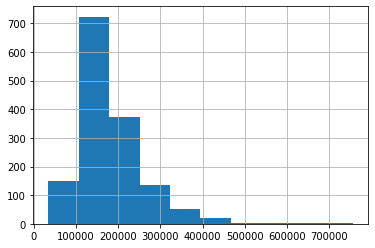

In [728]:
SP_DF['SalePrice'].hist()

In [729]:
SP_DF=SP_DF.loc[SP_DF['SalePrice']<300000]

## Integer Only 

In [730]:
IO_DF=SP_DF.select_dtypes(include='number')
IO_DF.head(2)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MoSold,YrSold,SalePrice,CentralAC,Functionality,NeighborhoodMedValue,ZoningMedian,ElectricalCat,Driveway,TotSFInclBsmt,TotalBaths,MedianSFByNeighborhood,MedPPSFNeigh,AvgPPSFNeigh
0,60,65.0,8450.0,7.0,5,2003.0,2003,200.0,4,3,4,3,706.0,0,150,856.0,5,856,854,0,1710.0,1,0,2,1,3,1,4,8.0,0.0,0,2003.0,2.0,548.0,3,3,0.0,50.0,0.0,0,0,0,2,2008,208500,1,8,197200,174000,1.87,1.69,2566.0,3.2,1500,74.80,75.21
1,20,80.0,9600.0,6.0,8,1976.0,1976,0.0,3,3,4,3,978.0,0,284,1262.0,5,1262,0,0,1262.0,0,1,2,0,3,1,3,6.0,1.0,3,1976.0,2.0,460.0,3,3,300.0,0.0,0.0,0,0,0,5,2007,181500,1,8,218000,174000,1.87,1.69,2524.0,2.2,1437,78.47,82.09


In [663]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler

In [731]:
X=IO_DF.drop('SalePrice', axis=1)
y=IO_DF['SalePrice']

stdscaler=StandardScaler()
X_scaled=stdscaler.fit_transform(X)

X_train, X_test, y_train, y_test=train_test_split(X_scaled, y, train_size=.8, random_state=22)

## Gradient Boosting Regressor

In [732]:
gbr2=GradientBoostingRegressor(max_depth=3, n_estimators=1000, learning_rate=0.05)

gbr2.fit(X, y)
#gbr2.score(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.05, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=1000,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [706]:
gbr2.score(X_test, y_test)

0.8448538091228001

In [707]:
gbr2_predictions=gbr2.predict(X_test)

gbr2_mse= mean_squared_error(y_test, gbr2_predictions)
gbr2_rmse=np.sqrt(gbr2_mse)
gbr2_rmse

# no dropped columns, price under 600K = 19,116    max depth=3   est=1000     lrate=0.05

17122.579077264058

In [668]:
import math
ylog=[]

for each in y_test:
    log=math.log(each)
    ylog.append(log)

predlog=[]

for each in gbr2_predictions:
    log=math.log(each)
    predlog.append(log)

In [669]:
log_mse= mean_squared_error(ylog, predlog)
log_rmse=np.sqrt(log_mse)
log_rmse

# 0.1086

0.12232571908149993

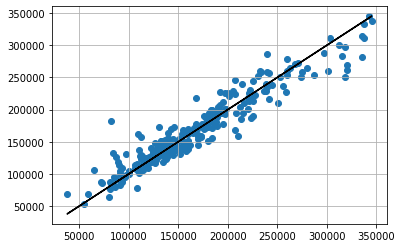

In [670]:
plt.scatter(y_test, gbr2_predictions)
plt.plot(y_test, y_test, 'k-')
plt.grid(axis='both')

## All Data

In [369]:
all_df=pd.get_dummies(SP_DF)

In [440]:
AX=all_df.drop('SalePrice', axis=1)
Ay=all_df['SalePrice']

AX_train, AX_test, Ay_train, Ay_test= train_test_split(AX, Ay, train_size=0.8, random_state=42)

In [441]:
Agbr=GradientBoostingRegressor(max_depth=3, n_estimators=1000, learning_rate=0.05)

Agbr.fit(X_train, y_train)
Agbr.score(X_train, y_train)

0.9939027080020458

In [442]:
Agbr.score(X_test, y_test)

0.9307986231749708

In [443]:
Agbr_predictions=Agbr.predict(X_test)

Agbr_mse= mean_squared_error(y_test, Agbr_predictions)
Agbr_rmse=np.sqrt(Agbr_mse)
Agbr_rmse

# 19,250    max_depth=3      est= 1000      Lrate=0.05

18991.037190604202

In [444]:
ylog=[]

for each in y_test:
    log=math.log(each)
    ylog.append(log)

predlog=[]

for each in Agbr_predictions:
    log=math.log(each)
    predlog.append(log)

In [445]:
log_mse= mean_squared_error(ylog, predlog)
log_rmse=np.sqrt(log_mse)
log_rmse


0.1084730196123202

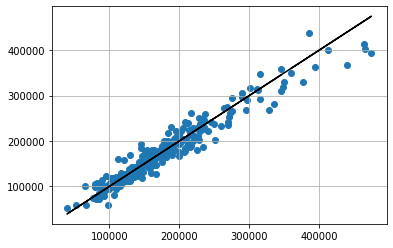

In [446]:
plt.scatter(y_test, Agbr_predictions)
plt.plot(y_test, y_test, 'k-')
plt.grid(axis='both')

# Prepare Test Data

In [603]:
Test_Data=pd.read_csv("../Kaggle_Housing_Prices/test.csv")
pd.options.display.max_columns=None
Test_Data.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal


In [604]:
clean_test=Test_Data.copy()

### Null Values

In [605]:
clean_test.isna().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         16
MasVnrArea         15
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           44
BsmtCond           45
BsmtExposure       44
BsmtFinType1       42
BsmtFinSF1          1
BsmtFinType2       42
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [606]:
## Lot Frontage fill with median
medianLF=clean_test['LotFrontage'].median()
clean_test['LotFrontage'].fillna(medianLF, inplace=True)

In [607]:
## Many houses do not have basements.  fill basement NaN's with 'none'
clean_test['BsmtQual'].fillna('none', inplace=True)
clean_test['BsmtCond'].fillna('none', inplace=True)
clean_test['BsmtExposure'].fillna('none', inplace=True)
clean_test['BsmtFinType1'].fillna('none', inplace=True)
clean_test['BsmtFinType2'].fillna('none', inplace=True)

In [608]:
clean_test['BsmtFinSF1'].fillna(0, inplace=True)
clean_test['BsmtFinSF2'].fillna(0, inplace=True)
clean_test['BsmtUnfSF'].fillna(0, inplace=True)
clean_test['TotalBsmtSF'].fillna(0, inplace=True)

In [609]:
clean_test['MSZoning'].value_counts()
# Fill MSZoning NaN with RL
clean_test['MSZoning'].fillna('RL', inplace=True)

clean_test['Utilities'].value_counts()
# Fill Utilities NaN with AllPub
clean_test['Utilities'].fillna('AllPub', inplace=True)

In [610]:
clean_test['Exterior1st'].value_counts()
# Fill with VinylSd
clean_test['Exterior1st'].fillna('VinylSd', inplace=True)

In [611]:
clean_test['Exterior2nd'].value_counts()
# Fill with VinylSd
clean_test['Exterior2nd'].fillna('VinylSd', inplace=True)

In [612]:
clean_test['BsmtFullBath'].fillna(0, inplace=True)
clean_test['BsmtHalfBath'].fillna(0, inplace=True)

In [613]:
## fill Alley NaN's with 'none'
clean_test['Alley'].fillna('none', inplace=True)

In [614]:
clean_test['KitchenQual'].value_counts()
clean_test['KitchenQual'].fillna('Gd', inplace=True)

In [615]:
## fil fireplaceQual NaN's with 'none'
clean_test['FireplaceQu'].fillna('none', inplace=True)

In [616]:
## take care of garage NaN's

clean_test['GarageType'].fillna('none', inplace=True)
clean_test['GarageYrBlt'].fillna(0, inplace=True)
clean_test['GarageFinish'].fillna('none', inplace=True)
clean_test['GarageQual'].fillna('none', inplace=True)
clean_test['GarageCond'].fillna('none', inplace=True)
clean_test['GarageCars'].fillna(0, inplace=True)
clean_test['GarageArea'].fillna(0, inplace=True)

In [617]:
## Drop pool and MiscFeature columns
clean_test.drop(['PoolQC', 'PoolArea', 'MiscFeature'], axis=1, inplace=True)

In [618]:
clean_test['Fence'].fillna('none', inplace=True)
clean_test['MasVnrType'].fillna('None', inplace=True)
clean_test['MasVnrArea'].fillna(0, inplace=True)

In [619]:
clean_test['Functional'].value_counts()
clean_test['Functional'].fillna('Typ', inplace=True)

In [620]:
clean_test['SaleType'].value_counts()
clean_test['SaleType'].fillna('WD', inplace=True)

In [621]:
### No more NaN's in dataset
pd.options.display.max_rows=None
clean_test.isnull().sum()[:5]

Id             0
MSSubClass     0
MSZoning       0
LotFrontage    0
LotArea        0
dtype: int64

### Quality can be numerical

In [622]:
clean_test.replace({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'none': 0}, inplace=True)
clean_test.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,3,CBlock,3,3,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,3,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,3,5,Typ,0,0,Attchd,1961.0,Unf,1.0,730.0,3,3,Y,140,0,0,0,120,MnPrv,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,0,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,3,3,CBlock,3,3,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,3,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,4,6,Typ,0,0,Attchd,1958.0,Unf,1.0,312.0,3,3,Y,393,36,0,0,0,0,12500,6,2010,WD,Normal


In [623]:
## Central Air
ac=[]

for each in clean_test['CentralAir']:
    if each == 'N':
        v=0
    elif each == 'Y':
        v=1
    ac.append(v)
    
clean_test['CentralAC']=ac
clean_test.drop('CentralAir', axis=1, inplace=True)

In [624]:
## Functional
fnc=[]

for each in clean_test['Functional']:
    if each=='Typ':
        q=8
    elif each =='Min1':
        q=7
    elif each =='Min2':
        q=6
    elif each =='Mod':
        q=5
    elif each =='Maj1':
        q=4
    elif each =='Maj2':
        q=3
    elif each == 'Sev':
        q=2
    elif each == 'Sal':
        q=1
    fnc.append(q)
    
clean_test['Functionality']=fnc
clean_test.drop('Functional', axis=1, inplace=True)

In [625]:
### Add a column using Median Neighborhood value

meds=[]

for each in clean_test['Neighborhood']:
    if each == 'MeadowV':
        m=88000
    elif each == 'IDOTRR':
        m=103000
    elif each == 'BrDale':
        m=106000
    elif each == 'OldTown':
        m=119000
    elif each == 'Edwards':
        m=121750
    elif each == 'BrkSide':
        m=124300
    elif each == 'Sawyer':
        m=135000
    elif each == 'Blueste':
        m=137500
    elif each == 'SWISU':
        m=139500
    elif each == 'NAmes':
        m=140000
    elif each == 'NPkVill':
        m=146000
    elif each == 'Mitchel':
        m=153500
    elif each == 'SawyerW':
        m=179900
    elif each == 'Gilbert':
        m=181000
    elif each == 'NWAmes':
        m=182900
    elif each == 'Blmngtn':
        m=191000
    elif each == 'CollgCr':
        m=197200
    elif each == 'ClearCr':
        m=200250
    elif each == 'Crawfor':
        m=200624
    elif each == 'Veenker':
        m=218000
    elif each == 'Somerst':
        m=225500
    elif each == 'Timber':
        m=228475
    elif each == 'StoneBr':
        m=278000
    elif each == 'NoRidge':
        m=301500
    elif each == 'NridgHt':
        m=315000
        
    meds.append(m)
    
clean_test['NeighborhoodMedValue']=meds

In [626]:
## Add a column using Zoning median Price

zmed=[]

for each in clean_test['MSZoning']:
    if each == 'C(all)':
        z=74700
    elif each == 'RM':
        z=120500
    elif each == 'RH':
        z=136500
    elif each == 'RL':
        z=174000
    elif each == 'FV':
        z=205950
    zmed.append(z)
    
clean_test['ZoningMedian']=zmed
clean_test.drop('MSZoning', axis=1, inplace=True)

In [627]:
## Add a column changing Electrical to representative of mean saleprice per category
Elec=[]

for each in clean_test['Electrical']:
    if each == 'Mix':
        E=.67
    elif each =='FuseP':
        E=.97
    elif each == 'FuseF':
        E=1.08
    elif each == 'FuseA':
        E=1.22
    elif each =='SBrkr':
        E=1.87
    Elec.append(E)
    
clean_test["ElectricalCat"]=Elec
clean_test.drop('Electrical', axis=1, inplace=True)

In [628]:
## Paved Drive based on Median sale price
paved=[]
for each in clean_test['PavedDrive']:
    if each == 'N':
        p=1.11
    elif each == 'P':
        p=1.32
    elif each == 'Y':
        p=1.69
    paved.append(p)

clean_test['Driveway']=paved
clean_test.drop('PavedDrive', axis=1, inplace=True)

In [629]:
## total sq ft plus basement
clean_test['TotSFInclBsmt']= clean_test['GrLivArea']+clean_test['TotalBsmtSF']
## Total Full Bath
TotFullBath=clean_test['BsmtFullBath']+clean_test['FullBath']
## Total Half Bath
TotHalfBath=clean_test['BsmtHalfBath']+clean_test['HalfBath']
## Total Baths with half baths represented as 0.2
clean_test['TotalBaths']=TotFullBath+(TotHalfBath*0.2)

In [630]:
### Add a column using  Median TotSFInclBsmt per NeighborhoodMedValue

# medSF=clean_df.groupby('NeighborhoodMedValue').median()
# medSF['TotalSF'].sort_values()

medsf=[]

for each in clean_test['NeighborhoodMedValue']:
    if each == 88000:
        m=1092
    elif each == 103000:
        m=1111
    elif each == 106000:
        m=1155
    elif each == 119000:
        m=1368
    elif each == 121750:
        m=1200
    elif each == 124300:
        m=1210
    elif each == 135000:
        m=1106
    elif each == 137500:
        m=1392
    elif each == 139500:
        m=1691
    elif each == 140000:
        m=1196
    elif each == 146000:
        m=1322
    elif each == 153500:
        m=1204
    elif each == 179900:
        m=1603
    elif each == 181000:
        m=1593
    elif each == 182900:
        m=1664
    elif each == 191000:
        m=1500
    elif each == 197200:
        m=1500
    elif each == 200250:
        m=1738
    elif each == 200624:
        m=1717
    elif each == 218000:
        m=1437
    elif each == 225500:
        m=1564
    elif each == 228475:
        m=1692
    elif each == 278000:
        m=1742
    elif each == 301500:
        m=2418
    elif each == 315000:
        m=1850
        
    medsf.append(m)
    
clean_test['MedianSFByNeighborhood']=medsf

In [631]:
## Add column MedianPricePerSF by Neighborhood and AvgByNeighborhood.  Price per SF will not be available in test data
##clean_df[['PricePerSF', 'Neighborhood']].groupby('Neighborhood').median().sort_values(by='PricePerSF', ascending=True)
##clean_df[['PricePerSF', 'Neighborhood']].groupby('Neighborhood').mean().sort_values(by='PricePerSF', ascending=True)
medP=[]
AvgP=[]

for each in clean_test['Neighborhood']:
    if each == 'SWISU':
        m=55.23
        a=58.10
    elif each =='IDOTRR':
        m=55.43
        a=53.82
    elif each =='OldTown':
        m=57.49
        a=57.58
    elif each =='Edwards':
        m=59.03
        a=61.59
    elif each =='BrDale':
        m=59.24
        a=61.00
    elif each =='MeadowV':
        m=59.92
        a=59.22
    elif each =='NAmes':
        m=63.95
        a=64.91
    elif each =='BrkSide':
        m=64.39
        a=65.13
    elif each =='NPkVill':
        m=64.68
        a=65.39
    elif each =='Sawyer':
        m=65.20
        a=64.45
    elif each =='NWAmes':
        m=66.62
        a=66.39
    elif each =='Mitchel':
        m=67.28
        a=66.78
    elif each =='Blueste':
        m=67.87
        a=67.87
    elif each =='Blmngton':
        m=68.56
        a=70.71
    elif each =='ClearCr':
        m=69.54
        a=71.81
    elif each =='SawyerW':
        m=71.13
        a=70.96
    elif each =='CollgCr':
        m=74.80
        a=75.21
    elif each =='Crawfor':
        m=76.32
        a=74.95
    elif each =='Gilbert':
        m=76.62
        a=77.38
    elif each =='Timber':
        m=78.26
        a=77.44
    elif each =='Veenker':
        m=78.47
        a=82.09
    elif each=='NoRidge':
        m=80.35
        a=82.67
    elif each =='Somerst':
        m=83.21
        a=82.65
    elif each =='StoneBr':
        m=87.64
        a=89.28
    elif each =='NridgHt':
        m=88.89
        a=88.61
    medP.append(m)
    AvgP.append(a)
    
clean_test['MedPPSFNeigh']=medP
clean_test['AvgPPSFNeigh']=AvgP

### Normalize the data between 2 and 3 std

In [632]:
test_df=clean_test.copy()

In [633]:
## OverallQual 3 std = 3
test_df.loc[test_df['OverallQual']<3, 'OverallQual']=np.nan
test_df.fillna(3, inplace=True)
test_df['OverallQual'].min()

3.0

In [634]:
## GrLivArea  600 to 3000
test_df.loc[test_df['GrLivArea']<600, 'GrLivArea']=np.nan
test_df.fillna(600, inplace=True)
test_df['GrLivArea'].min()

test_df.loc[test_df['GrLivArea']>2800, 'GrLivArea']=np.nan
test_df.fillna(2800, inplace=True)
test_df['GrLivArea'].max()

2800.0

In [635]:
## TotalBsmtSF max 2000
test_df.loc[test_df['TotalBsmtSF']>2000, 'TotalBsmtSF']=np.nan
test_df.fillna(2000, inplace=True)
test_df['TotalBsmtSF'].max()

2000.0

In [636]:
## TotSFInclBsmt limits 900 to 4500 
test_df.loc[test_df['TotSFInclBsmt']<900, 'TotSFInclBsmt']=np.nan
test_df.fillna(900, inplace=True)
test_df['TotSFInclBsmt'].min()

test_df.loc[test_df['TotSFInclBsmt']>4500, 'TotSFInclBsmt']=np.nan
test_df.fillna(4500, inplace=True)
test_df['TotSFInclBsmt'].max()

4500.0

In [637]:
## GarageCars max 3
test_df.loc[test_df['GarageCars']>3, 'GarageCars']=np.nan
test_df.fillna(3, inplace=True)
test_df['GarageCars'].max()

3.0

In [638]:
## GarageArea max 900
test_df.loc[test_df['GarageArea']>900, 'GarageArea']=np.nan
test_df.fillna(900, inplace=True)
test_df['GarageArea'].max()

900.0

In [639]:
## TotalBaths max 3.2
test_df.loc[test_df['TotalBaths']>3.2, 'TotalBaths']=np.nan
test_df.fillna(3.2, inplace=True)
test_df['TotalBaths'].max()

3.2

In [640]:
## YearBuilt 1900 min
test_df.loc[test_df['YearBuilt']<1920, 'YearBuilt']=np.nan
test_df.fillna(1920, inplace=True)
test_df['YearBuilt'].min()

1920.0

In [641]:
##  TotRmsAbvGrd max 9 min 4
test_df.loc[test_df['TotRmsAbvGrd']>9, 'TotRmsAbvGrd']=np.nan
test_df.fillna(9, inplace=True)
test_df['TotRmsAbvGrd'].max()

test_df.loc[test_df['TotRmsAbvGrd']<4, 'TotRmsAbvGrd']=np.nan
test_df.fillna(4, inplace=True)
test_df['TotRmsAbvGrd'].min()

4.0

In [642]:
## Fireplaces max 2
test_df.loc[test_df['Fireplaces']>2, 'Fireplaces']=np.nan
test_df.fillna(2, inplace=True)
test_df['Fireplaces'].max()

2.0

In [643]:
##  MasVnrArea group 0, 200, 400
test_df.loc[test_df['MasVnrArea']>200, 'MasVnrArea']=np.nan
test_df.fillna(400, inplace=True)

test_df.loc[(test_df['MasVnrArea']>1)&(test_df['MasVnrArea']<=200), 'MasVnrArea']=np.nan
test_df.fillna(200, inplace=True)
test_df['MasVnrArea'].max()

400.0

In [644]:
## OpenPorchSF group 0, 50, 100
test_df.loc[(test_df['OpenPorchSF']>1)&(test_df['OpenPorchSF']<75), 'OpenPorchSF']=np.nan
test_df.fillna(50, inplace=True)

test_df.loc[test_df['OpenPorchSF']>=75, 'OpenPorchSF']=np.nan
test_df.fillna(100, inplace=True)
test_df['OpenPorchSF'].max()

100.0

In [645]:
## WoodDeckSF groups 0, 100, 200, 300, 400
test_df.loc[(test_df['WoodDeckSF']>1)&(test_df['WoodDeckSF']<=100), 'WoodDeckSF']=np.nan
test_df.fillna(100, inplace=True)

test_df.loc[(test_df['WoodDeckSF']>100)&(test_df['WoodDeckSF']<=200), 'WoodDeckSF']=np.nan
test_df.fillna(200, inplace=True)

test_df.loc[(test_df['WoodDeckSF']>200)&(test_df['WoodDeckSF']<=300), 'WoodDeckSF']=np.nan
test_df.fillna(300, inplace=True)

test_df.loc[test_df['WoodDeckSF']>300, 'WoodDeckSF']=np.nan
test_df.fillna(400, inplace=True)
test_df['WoodDeckSF'].max()

400.0

In [646]:
## BsmtFinSF1 max at 1500
test_df.loc[test_df['BsmtFinSF1']>1500, 'BsmtFinSF1']=np.nan
test_df.fillna(1500, inplace=True)
test_df['BsmtFinSF1'].max()

1500.0

In [647]:
## LotFrontage max 130
test_df.loc[test_df['LotFrontage']>130, 'LotFrontage']=np.nan
test_df.fillna(130, inplace=True)
test_df['LotFrontage'].max()

130.0

In [648]:
## LotArea max 20000
test_df.loc[test_df['LotArea']>20000, 'LotArea']=np.nan
test_df.fillna(20000, inplace=True)
test_df['LotArea'].max()

20000.0

In [649]:
## EnclosedPorch max 350
test_df.loc[test_df['EnclosedPorch']>350, 'EnclosedPorch']=np.nan
test_df.fillna(350, inplace=True)
test_df['EnclosedPorch'].max()

350.0

## Start with Integer Only

In [719]:
IO_TestData=test_df.select_dtypes(include='number')
IO_TestData.head(2)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MoSold,YrSold,CentralAC,Functionality,NeighborhoodMedValue,ZoningMedian,ElectricalCat,Driveway,TotSFInclBsmt,TotalBaths,MedianSFByNeighborhood,MedPPSFNeigh,AvgPPSFNeigh
0,1461,20,80.0,11622.0,5.0,6,1961.0,1961,0.0,3,3,3,3,468.0,144.0,270.0,882.0,3,896,0,0,896.0,0.0,0.0,1,0,2,1,3,5.0,0.0,0,1961.0,1.0,730.0,3,3,200.0,0.0,0.0,0,120,0,6,2010,1,8,140000,136500,1.87,1.69,1778.0,1.0,1196,63.95,64.91
1,1462,20,81.0,14267.0,6.0,6,1958.0,1958,200.0,3,3,3,3,923.0,0.0,406.0,1329.0,3,1329,0,0,1329.0,0.0,0.0,1,1,3,1,4,6.0,0.0,0,1958.0,1.0,312.0,3,3,400.0,50.0,0.0,0,0,12500,6,2010,1,8,140000,174000,1.87,1.69,2658.0,1.2,1196,63.95,64.91


In [720]:
IDs=IO_TestData['Id']

IO_TestDataX=IO_TestData.drop('Id', axis=1)

In [738]:
Test_Predictions=gbr2.predict(IO_TestDataX)

In [739]:
Submission=pd.DataFrame({
    'ID': IDs,
    'SalePrice': Test_Predictions
})

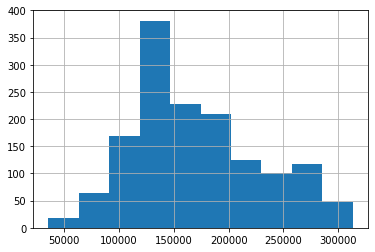

In [740]:
Submission['SalePrice'].hist()

In [741]:
Submission.to_csv(r'C:\Users\chris\OneDrive\Documents\Extracurricular_projects\Ames_Iowa_Predictions\Kaggle_Housing_Prices\submission5.csv', index=False, header=True)

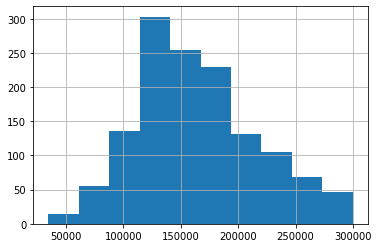

In [733]:
SP_DF['SalePrice'].hist()

## All Data For Test Submission

In [534]:
test=pd.get_dummies(test_df)

In [539]:
test.head(1)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MoSold,YrSold,CentralAC,Functionality,NeighborhoodMedValue,ZoningMedian,ElectricalCat,Driveway,TotSFInclBsmt,TotalBaths,MedianSFByNeighborhood,MedPPSFNeigh,AvgPPSFNeigh,Street_Grvl,Street_Pave,Alley_0,Alley_Grvl,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtExposure_0,BsmtExposure_4,BsmtExposure_Av,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_0,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_0,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_Wall,GarageType_0,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_0,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,Fence_0,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461,20,80.0,11622.0,5.0,6,1961.0,1961,0.0,3,3,3,3,468.0,144.0,270.0,882.0,3,896,0,0,896.0,0.0,0.0,1,0,2,1,3,5.0,0.0,0,1961.0,1.0,730.0,3,3,200.0,0.0,0.0,0,120,0,6,2010,1,8,140000,136500,1.87,1.69,1778.0,1.0,1196,63.95,64.91,0,1,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,

In [540]:
all_df.head(1)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MoSold,YrSold,SalePrice,CentralAC,Functionality,NeighborhoodMedValue,ZoningMedian,ElectricalCat,Driveway,TotSFInclBsmt,TotalBaths,MedianSFByNeighborhood,MedPPSFNeigh,AvgPPSFNeigh,Street_Grvl,Street_Pave,Alley_0,Alley_Grvl,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_0,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtExposure_0,BsmtExposure_4,BsmtExposure_Av,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_0,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_0,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,GarageType_0,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_0,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,Fence_0,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450.0,7.0,5,2003.0,2003,200.0,4,3,4,3,706.0,0,150,856.0,5,856,854,0,1710.0,1,0,2,1,3,1,4,8.0,0.0,0,

In [ ]:
## Add to test 
# Utilities_NoSeWa, Condition2_RRAn, Condition2_RRNn

In [537]:
## separate ID from data

IDs=test['Id']

TestData_X=test.drop('Id', axis=1)

In [543]:
#Test_Predictions=Agbr.predict(TestData_X)